In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import io
from google.colab import files

datapath = '/content/drive/My Drive/WorldPopulationChallenge/'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

training = pd.read_csv(datapath + 'population_training.csv', encoding='cp1252').dropna(axis=0)
testing  = pd.read_csv(datapath + 'population_testing.csv', encoding='cp1252').dropna(axis=0)

In [4]:
print(training.shape)
print(testing.shape)

training_matrix = training.values
print(training_matrix)

testing_matrix = testing.values
print(testing_matrix)

(40, 213)
(17, 213)
[[    1960    54211  8996351 ... 17456855  3044846  3747369]
 [    1961    55438  9166764 ... 17920673  3140264  3870756]
 [    1962    56225  9345868 ... 18401608  3240587  3999419]
 ...
 [    1997    85451 18381605 ... 43657024  9666578 11709997]
 [    1998    87277 18863999 ... 44372112  9950224 11893272]
 [    1999    89005 19403676 ... 45058775 10239714 12064537]]
[[2.0000000e+03 9.0853000e+04 2.0093756e+07 ... 4.5728315e+07
  1.0531221e+07 1.2222251e+07]
 [2.0010000e+03 9.2898000e+04 2.0966463e+07 ... 4.6385006e+07
  1.0824125e+07 1.2366165e+07]
 [2.0020000e+03 9.4992000e+04 2.1979923e+07 ... 4.7026173e+07
  1.1120409e+07 1.2500525e+07]
 ...
 [2.0140000e+03 1.0379500e+05 3.2758020e+07 ... 5.4539571e+07
  1.5620974e+07 1.5411675e+07]
 [2.0150000e+03 1.0434100e+05 3.3736494e+07 ... 5.5291225e+07
  1.6100587e+07 1.5777451e+07]
 [2.0160000e+03 1.0482200e+05 3.4656032e+07 ... 5.6015473e+07
  1.6591390e+07 1.6150362e+07]]


In [5]:
training.head()

,Id,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,54211,8996351,5643182,1608800,13411,92634,20619075,1874120,20013,55339,10276477,7047539,3895396,2786106,9153489,2431622,4829288,48199747,7867374,162427,109528,3225668,8198000,92064,44400,3693449,72207554,230939,81745,223288,524552,1503508,17909009,5327827,109420,7716625,667070000,3558988,5176268,...,2755947,2955152,64253,289966,4068095,1584720,7484656,349174,41700,4573512,5726,3001593,1580513,27397175,2087038,1603258,499950,61601,848479,4176266,27472331,6104,10074507,6788214,42662149,2538651,180671000,8549493,80949,8146847,8033,32500,32670629,63699,108646,947000,5172135,17456855,3044846,3747369
1,1961,55438,9166764,5753024,1659800,14375,101078,20953077,1941491,20486,56144,10483000,7086299,4030320,2839666,9183948,2465867,4894580,49592802,7943118,167894,115108,3288602,8271216,94703,45500,3764813,74351763,231678,85596,228918,537249,1529227,18271000,5434294,110399,7890156,660330000,3694205,5285231,...,2814096,3011110,64551,298188,4191667,1594131,7519998,357453,42889,4721896,5763,3060355,1597526,28224204,2159123,1658362,508845,63745,865360,4235937,28146893,6246,10373398,7006633,43203635,2571690,183691000,8837349,82142,8461685,8155,34300,33666772,65713,112119,966000,5260501,17920673,3140264,3870756
2,1962,56225,9345868,5866061,1711319,15370,112472,21287682,2009526,21117,57144,10742000,7129864,4171425,2893669,9220578,2502896,4960326,51030137,8012946,173144,121083,3353226,8351928,97384,46600,3838097,76573248,232586,89516,234706,550840,1556661,18614000,5573815,111457,8067136,665770000,3841071,5399922,...,2874190,3069913,64432,306328,4238188,1603649,7561588,365636,44042,4875422,5763,3121216,1612755,29081034,2236559,1715408,518107,66259,880023,4303131,28832805,6389,10683906,7240174,43749470,2603887,186538000,9138097,83206,8790589,8298,35000,34684165,67808,115788,994000,5351799,18401608,3240587,3999419
3,1963,56695,9533954,5980417,1762621,16412,125566,21621840,2077575,21882,58294,10950000,7175811,4315128,2949926,9289770,2542859,5027821,52532417,8078145,178140,127333,3417574,8437232,100164,47700,3913395,78854019,233587,93576,240778,565353,1585763,18964000,5694247,112595,8247415,682335000,3996941,5520332,...,2936443,3131557,64177,314528,4282017,1616971,7604328,373897,45176,5034646,5740,3183551,1631764,29967041,2318234,1773853,527749,69005,892569,4377637,29531342,6538,11005905,7487429,44285899,2635129,189242000,9454250,84167,9130349,8452,39800,35722091,69964,119561,1022000,5446063,18899275,3345145,4132756
4,1964,57032,9731361,6093321,1814135,17469,138529,21953929,2144998,22698,59524,11167000,7223801,4456689,3010859,9378113,2585965,5098890,54129100,8144340,182887,133698,3478995,8524224,103069,48900,3990857,81168654,234547,97848,247325,580799,1616516,19325000,5789228,113773,8430838,698355000,4157965,5646316,...,3001126,3196113,64212,322997,4327341,1632114,7661354,382469,46322,5200336,5710,3246505,1662073,30881332,2402455,1833063,537786,71757,903275,4458611,30244232,6684,11339097,7746198,44794327,2665390,191889000,9788986,85069,9476252,8627,40800,36780985,72131,123354,1050000,5543339,19412975,3452942,4269863


In [6]:
training.tail()

,Id,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
35,1995,80324,17099541,14268994,3187784,63850,2448820,34994814,3217342,52868,73619,18072000,7948278,7685000,5962058,10136811,5905558,10089878,118706871,8406067,563699,280150,3843712,10194000,206963,59746,7566714,162296612,264959,297192,514877,1569094,3352767,29354000,7040687,144046,14296613,1204855000,14540820,13460994,...,7704894,5459519,126454,443724,5361999,1989872,8826939,960792,75304,14345492,15332,7000722,4274024,59491790,5764712,4207840,871447,96076,1255001,9113975,58486381,9230,29960776,20550291,51512299,3224804,266278000,22785000,108122,22188667,18427,107818,75198977,168235,170157,2029000,15320653,42088165,9137077,11320346
36,1996,83200,17822884,14682284,3168033,64360,2571020,35419682,3168215,53929,75628,18311000,7959017,7763000,6041112,10156637,6094259,10372745,121269645,8362826,578668,283790,3780378,10160000,213676,60129,7717443,164913306,265942,304699,519282,1604060,3435821,29671900,7071850,144829,14497826,1217550000,14995249,13812472,...,7892389,5591114,128821,450036,5373361,1988628,8840998,981764,76417,14755286,15966,7241134,4398238,60151472,5849540,4287344,875916,96369,1258364,9256037,59423208,9256,30811854,21202118,51057189,3248035,269394000,23225000,108075,22650102,18833,108095,76372719,171801,171283,2059000,15889449,42898520,9394304,11518262
37,1997,85451,18381605,15088981,3148281,64327,2700010,35833969,3133086,54941,77739,18517000,7968041,7838250,6112097,10181245,6281639,10665546,123854640,8312068,594930,286970,3752431,10117000,221606,60497,7870855,167545164,266945,312038,528754,1637635,3517309,29987200,7088906,145715,14694835,1230075000,15445986,14165423,...,8137475,5814006,131107,455954,5383291,1985956,8846062,1003995,77319,15177456,16528,7493251,4534551,60863506,5934282,4355114,871994,96725,1260678,9384152,60372499,9277,31635251,21865931,50594105,3271010,272657000,23667000,108004,23110178,19270,108357,77453335,174999,172198,2086000,16408954,43657024,9666578,11709997
38,1998,87277,18863999,15504318,3128530,64142,2838145,36241590,3108684,55901,79851,18711000,7976789,7913000,6186352,10203008,6470265,10968724,126447965,8256786,613702,290060,3750485,10069000,230284,60943,8026254,170170640,267950,319222,542155,1669625,3597385,30247900,7110001,146671,14887756,1241935000,15884552,14523570,...,8422372,6099923,133418,461560,5390516,1981629,8850974,1026009,78846,15602210,17115,7759258,4679023,61597283,6021691,4413477,865194,97135,1262542,9499395,61329590,9306,32451713,22551789,50143939,3292138,275854000,24051000,107922,23569454,19722,108537,78452897,178078,172981,1966000,16896210,44372112,9950224,11893272
39,1999,89005,19403676,15949766,3108778,64370,2988162,36648068,3089017,56770,81831,18926000,7992324,7982750,6278940,10226419,6664098,11282701,129029691,8210624,636545,293572,3759118,10026738,239026,61285,8182712,172759243,268922,326289,557543,1699862,3676508,30499200,7143991,147687,15076952,1252735000,16300233,14891891,...,8720231,6405864,135886,467003,5396020,1983045,8857874,1045629,80410,16016092,17864,8041846,4825704,62306651,6114886,4466132,863269,97591,1264775,9603742,62287326,9345,33291540,23272995,49673350,3309318,27904000

In [7]:
testing.head()

,Id,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,90853,20093756,16440924,3089027,65390,3154925,37057452,3069588,57521,83584,19153000,8011566,8048600,6400706,10251250,6865951,11607942,131581243,8170172,664614,297890,3766706,9979610,247315,61833,8339512,175287587,269847,333241,573416,1728340,3754986,30769700,7184250,148725,15262754,1262645000,16686561,15274234,...,9011479,6700656,138606,472390,5388720,1988925,8872109,1061468,81131,16410848,18873,8342559,4970367,62958021,6216205,4516131,871607,98082,1267984,9699197,63240121,9420,34178042,24039274,49175848,3321245,282162411,24650400,107898,24488340,20645,108642,80285562,185063,174610,1700000,17874725,45728315,10531221,12222251
1,2001,92898,20966463,16983266,3060173,67341,3326032,37471509,3050655,58175,85057,19413000,8042293,8111200,6555829,10286570,7076733,11944587,134107160,8009142,697549,303135,3771284,9928549,254984,62504,8496375,177750670,270685,340117,589600,1754935,3832203,31081900,7229854,149793,15444969,1271850000,17040152,15671927,...,9290823,6974442,141622,477740,5378867,1992060,8895960,1072927,81202,16766899,20185,8663012,5111770,63543322,6327125,4564080,892531,98611,1272380,9785701,64191474,9512,35117019,24854892,48683865,3327103,284968955,24964450,107988,24948476,21085,108549,81139919,189290,175566,1701154,18390135,46385006,10824125,12366165
2,2002,94992,21979923,17572649,3051010,70049,3507232,37889370,3033897,58731,86266,19651400,8081957,8171950,6741569,10332785,7295394,12293100,136600667,7837161,735148,309157,3775807,9865548,262206,62912,8653345,180151021,271478,346867,606399,1779953,3907612,31362000,7284753,150901,15623635,1280400000,17366517,16084886,...,9564167,7237276,144889,483044,5376912,1994530,8924958,1080930,83723,17087901,21742,9001689,5251472,64073164,6447688,4610002,923825,99184,1277837,9864326,65143054,9635,36105808,25718048,48202500,3327773,287625193,25271850,108146,25408700,21529,108510,81956496,193956,176582,1702310,18919179,47026173,11120409,12500525
3,2003,97017,23064851,18203369,3039616,73182,3741932,38309379,3017806,59117,87293,19895400,8121423,8234100,6953113,10376133,7520555,12654621,139019001,7775327,778711,315746,3779247,9796749,269130,63325,8810420,182482149,272258,353389,623434,1804339,3981665,31676000,7339001,152038,15799542,1288400000,17679355,16513822,...,9836397,7501642,148372,488332,5373374,1995733,8958229,1087392,82781,17415266,23410,9353201,5391401,64554952,6576877,4655741,960852,99789,1284052,9939678,66085803,9767,37149072,26624820,47812950,3325637,290107933,25567650,108350,25868523,22000,108506,82747662,198964,177662,1703466,19462086,47648727,11421984,12633897
4,2004,98737,24118979,18865716,3026939,76244,4087931,38728696,3000612,59264,88257,20127400,8171966,8306500,7182451,10421137,7750004,13030569,141307489,7716860,829848,322526,3781287,9730146,276089,63740,8967741,184738458,273091,359523,640282,1829330,4055036,31995000,7389625,153170,15973778,1296075000,17997738,16959081,...,10116228,7787655,151969,493630,5372280,1997012,8993531,1095053,82475,17806638,25028,9710043,5534598,65002231,6712841,4703398,996698,100406,1290535,10017601,67007855,9894,38249984,27568436,47451600,3324096,292805298

In [8]:
testing.tail()

,Id,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
12,2012,102577,30696958,25096150,2900401,82431,8900453,42096739,2881922,55230,96777,22742475,8429991,9295784,9319710,11128246,9729160,16571216,155727053,7305888,1300217,372039,3648200,9464495,336701,64798,10239004,200560983,281585,399748,752967,2089315,4490416,34750545,7996861,161358,17309746,1350695000,21418603,21082383,...,12763776,10818258,182889,537077,5407579,2057159,9519374,1248158,88303,20420701,32431,12705135,6859482,67843979,7995062,5267839,1156760,104951,1341588,10886668,74569867,10725,49082997,36306796,45593300,3396777,313998379,29774500,109328,29893080,28509,108191,90451881,247485,189194,1805200,24909969,52998213,14699937,14710826
13,2013,103187,31731688,25998340,2895092,80788,9006263,42539925,2893509,55307,97824,23145901,8479375,9416801,9600186,11182817,10004451,17072723,157571292,7265115,1315411,377240,3604999,9465997,344181,65001,10400264,202408632,282509,405716,764961,2128507,4499653,35152370,8089346,162180,17462982,1357380000,21966312,21655715,...,13132349,11177490,187045,542540,5413393,2059953,9600379,1271456,89949,19809141,33108,13133589,7042948,68143065,8177809,5366277,1184366,105328,1348248,11014558,75787333,10819,50636595,37553726,45489600,3408005,316204908,30243200,109320,30317848,29056,108044,91497725,253142,190757,1824100,25576322,53767396,15153210,15054506
14,2014,103795,32758020,26920466,2889104,79223,9070867,42981515,2906220,55437,98875,23504138,8541575,9535079,9891790,11209057,10286712,17585977,159405279,7223938,1336397,382169,3566002,9474511,351694,65139,10562159,204213133,283385,411704,776448,2168573,4515392,35535348,8188649,162969,17613798,1364270000,22531350,22239904,...,13513125,11530971,191266,547928,5418649,2061980,9696110,1295097,91359,19203090,33739,13569438,7228915,68416772,8362745,5466241,1212814,105782,1354493,11143908,77030628,10908,52234869,38833338,45271947,3419546,318563456,30757700,109357,30738378,29588,107884,92544915,258850,192290,1821800,26246327,54539571,15620974,15411675
15,2015,104341,33736494,27859305,2880703,78014,9154302,43417765,2916950,55537,99923,23850784,8633169,9649341,10199270,11274196,10575952,18110624,161200886,7177991,1371855,386838,3535961,9489616,359288,65250,10724705,205962108,284217,417542,787386,2209197,4546100,35832513,8282396,163758,17762681,1371220000,23108472,22834522,...,13908129,11882136,195553,553208,5423801,2063531,9799186,1319011,93419,18734987,34339,14009413,7416802,68657600,8548651,5565284,1240977,106364,1360092,11273661,78271472,11001,53879957,40144870,45154029,3431552,320896618,31298900,109455,31155134,30113,107710,93571567,264603,193759,1801800,26916207,55291225,16100587,15777451
16,2016,104822,34656032,28813463,2876101,77281,9269612,43847430,2924816,55599,100963,24210809,8731471,9757812,10524117,11338476,10872298,18646433,162951560,7127822,1425171,391232,3516816,9501534,366954,65376,10887882,207652865,284996,423196,797765,2250260,4594621,36264604,8372413,164541,17909754,1378665000,23695919,23439189,...,14317996,12230730,199910,558368,5430798,2065042,9923085,1343098,94677,18430453,34900,14452543,7606374,68863514,8734951,5662544,1268671,107122,1364962,11403248,

In [0]:
def scatter_plot(feature, target):
  plt.figure(figsize = (16, 8))
  plt.scatter(
      training[feature],
      training[target],
      c = 'blue'
  )
  plt.xlabel("Years".format(feature))
  plt.ylabel("Population of the Country")
  plt.show()

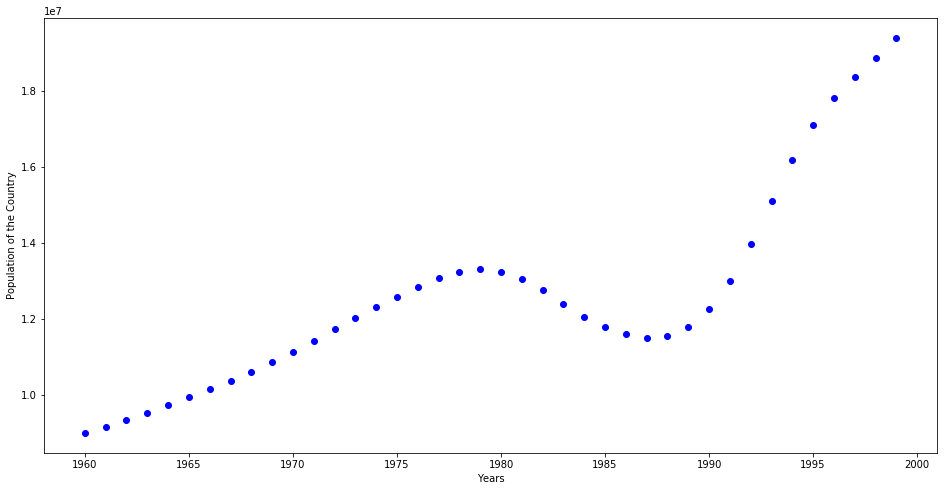

In [11]:
scatter_plot('Id', 'Afghanistan')

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

x_train = training.iloc[:30].drop(columns = ['Id'])
#y_train = training.iloc[:30][['Brazil']]
x_test = training.iloc[30:].drop(columns = ['Id'])
#y_test = training.iloc[30:][['Brazil']]

In [13]:
x_train.head()

,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.",...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,54211,8996351,5643182,1608800,13411,92634,20619075,1874120,20013,55339,10276477,7047539,3895396,2786106,9153489,2431622,4829288,48199747,7867374,162427,109528,3225668,8198000,92064,44400,3693449,72207554,230939,81745,223288,524552,1503508,17909009,5327827,109420,7716625,667070000,3558988,5176268,15248251,...,2755947,2955152,64253,289966,4068095,1584720,7484656,349174,41700,4573512,5726,3001593,1580513,27397175,2087038,1603258,499950,61601,848479,4176266,27472331,6104,10074507,6788214,42662149,2538651,180671000,8549493,80949,8146847,8033,32500,32670629,63699,108646,947000,5172135,17456855,3044846,3747369
1,55438,9166764,5753024,1659800,14375,101078,20953077,1941491,20486,56144,10483000,7086299,4030320,2839666,9183948,2465867,4894580,49592802,7943118,167894,115108,3288602,8271216,94703,45500,3764813,74351763,231678,85596,228918,537249,1529227,18271000,5434294,110399,7890156,660330000,3694205,5285231,15637733,...,2814096,3011110,64551,298188,4191667,1594131,7519998,357453,42889,4721896,5763,3060355,1597526,28224204,2159123,1658362,508845,63745,865360,4235937,28146893,6246,10373398,7006633,43203635,2571690,183691000,8837349,82142,8461685,8155,34300,33666772,65713,112119,966000,5260501,17920673,3140264,3870756
2,56225,9345868,5866061,1711319,15370,112472,21287682,2009526,21117,57144,10742000,7129864,4171425,2893669,9220578,2502896,4960326,51030137,8012946,173144,121083,3353226,8351928,97384,46600,3838097,76573248,232586,89516,234706,550840,1556661,18614000,5573815,111457,8067136,665770000,3841071,5399922,16041263,...,2874190,3069913,64432,306328,4238188,1603649,7561588,365636,44042,4875422,5763,3121216,1612755,29081034,2236559,1715408,518107,66259,880023,4303131,28832805,6389,10683906,7240174,43749470,2603887,186538000,9138097,83206,8790589,8298,35000,34684165,67808,115788,994000,5351799,18401608,3240587,3999419
3,56695,9533954,5980417,1762621,16412,125566,21621840,2077575,21882,58294,10950000,7175811,4315128,2949926,9289770,2542859,5027821,52532417,8078145,178140,127333,3417574,8437232,100164,47700,3913395,78854019,233587,93576,240778,565353,1585763,18964000,5694247,112595,8247415,682335000,3996941,5520332,16461930,...,2936443,3131557,64177,314528,4282017,1616971,7604328,373897,45176,5034646,5740,3183551,1631764,29967041,2318234,1773853,527749,69005,892569,4377637,29531342,6538,11005905,7487429,44285899,2635129,189242000,9454250,84167,9130349,8452,39800,35722091,69964,119561,1022000,5446063,18899275,3345145,4132756
4,57032,9731361,6093321,1814135,17469,138529,21953929,2144998,22698,59524,11167000,7223801,4456689,3010859,9378113,2585965,5098890,54129100,8144340,182887,133698,3478995,8524224,103069,48900,3990857,81168654,234547,97848,247325,580799,1616516,19325000,5789228,113773,8430838,698355000,4157965,5646316,16903923,...,3001126,3196113,64212,322997,4327341,1632114,7661354,382469,46322,5200336,5710,3246505,1662073,30881332,2402455,1833063,537786,71757,903275,4458611,30244232,6684,11339097,7746198,44794327,2665390,191889000,9788986,85069,9476252,8627,40800,36780985,72131,123354,1050000,5543339,19412975,3452942,4269863


In [14]:
x_train.iloc[0, :]

Aruba              54211
Afghanistan      8996351
Angola           5643182
Albania          1608800
Andorra            13411
                  ...   
Kosovo            947000
Yemen, Rep.      5172135
South Africa    17456855
Zambia           3044846
Zimbabwe         3747369
Name: 0, Length: 212, dtype: int64

In [0]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

1.0
0.9889275972712932


In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
y_pred = lr.predict(x_test)
y_pred

array([[1.49324284e+08],
       [1.51887117e+08],
       [1.54428646e+08],
       [1.56910943e+08],
       [1.59340726e+08],
       [1.61748209e+08],
       [1.64141983e+08],
       [1.66525135e+08],
       [1.68878226e+08],
       [1.71224471e+08]])

In [0]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr


array([[1.        , 0.99988791, 0.99978189],
       [0.99988791, 1.        , 0.99998059],
       [0.99978189, 0.99998059, 1.        ]])

In [15]:
df = training
corr_matrix = df.corr().drop('Id', axis=1).drop('Id', axis=0)
corr_matrix[corr_matrix == 1] = 0
corr_matrix

,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.",...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Aruba,0.000000,0.953417,0.883784,0.660722,0.830430,0.879895,0.828129,0.471571,0.862872,0.716066,0.811344,0.860359,0.799747,0.848399,0.782472,0.901564,0.894936,0.853543,-0.111022,0.837543,0.802254,0.063377,0.638424,0.878209,0.742646,0.850397,0.818221,0.792994,0.838834,0.711970,0.843249,0.873108,0.813066,0.835963,0.804841,0.832408,0.791830,0.863353,0.871688,0.893114,...,0.739776,0.707248,0.842562,0.895542,0.719144,0.641816,0.815849,0.852493,0.813754,0.861502,0.932004,0.910315,0.862527,0.770249,0.820088,0.851567,0.894060,0.600016,0.751769,0.839962,0.821007,0.748243,0.875904,0.886845,0.529521,0.847277,0.852894,0.831779,0.681670,0.838759,0.880551,0.609176,0.832807,0.853119,0.715619,0.761383,0.919073,0.841219,0.854344,0.830199
Afghanistan,0.953417,0.000000,0.868136,0.719113,0.841448,0.869830,0.849279,0.575673,0.850361,0.865288,0.849541,0.921696,0.839920,0.842547,0.872026,0.886332,0.880450,0.859274,0.077595,0.843789,0.842232,0.201523,0.715572,0.877495,0.780758,0.862124,0.843257,0.840223,0.861627,0.750684,0.847174,0.866830,0.853665,0.879036,0.839262,0.859582,0.841367,0.861372,0.866261,0.891960,...,0.773754,0.741178,0.860532,0.902965,0.776493,0.718577,0.882861,0.848357,0.874011,0.862691,0.880927,0.896917,0.862577,0.817455,0.834468,0.866969,0.879339,0.727741,0.779925,0.842925,0.843605,0.791057,0.875724,0.882017,0.639640,0.864732,0.877672,0.852997,0.751555,0.856757,0.848072,0.746193,0.852085,0.869336,0.813276,0.795969,0.884795,0.857691,0.859540,0.833922
Angola,0.883784,0.868136,0.000000,0.918444,0.988987,0.998318,0.987749,0.790208,0.994979,0.693612,0.975395,0.907533,0.969655,0.995385,0.896684,0.998877,0.999303,0.994699,0.212849,0.993848,0.969062,0.463221,0.889480,0.994414,0.898106,0.993903,0.983984,0.969709,0.988999,0.950045,0.995344,0.998957,0.975195,0.938442,0.970845,0.984438,0.965573,0.998375,0.999079,0.997880,...,0.951620,0.939549,0.991352,0.930181,0.938166,0.899641,0.943767,0.996981,0.958066,0.997489,0.982566,0.996866,0.996364,0.962752,0.988415,0.992383,0.945276,0.795722,0.965014,0.994554,0.985828,0.950453,0.998388,0.998487,0.809305,0.979493,0.986939,0.987786,0.918801,0.989963,0.992001,0.815869,0.988273,0.992928,0.874632,0.957624,0.993615,0.991170,0.996111,0.992802
Albania,0.660722,0.719113,0.918444,0.000000,0.960381,0.914596,0.965937,0.966832,0.933230,0.704652,0.973682,0.874822,0.977788,0.944816,0.925867,0.904814,0.910969,0.949845,0.558038,0.948780,0.976546,0.768379,0.993920,0.930510,0.934418,0.952675,0.970861,0.976573,0.960635,0.992727,0.951682,0.933146,0.973030,0.927185,0.972908,0.965242,0.978903,0.938635,0.932401,0.920706,...,0.961327,0.980110,0.953521,0.849103,0.993066,0.994981,0.950934,0.940474,0.962382,0.942426,0.831056,0.897776,0.941115,0.986439,0.966896,0.953700,0.853325,0.926839,0.987611,0.954103,0.969047,0.989777,0.933258,0.923515,0.969280,0.951201,0.954475,0.964707,0.996476,0.960829,0.899820,0.939903,0.964141,0.952215,0.948013,0.979043,0.871428,0.959077,0.947562,0.958393
Andorra,0.830430,0.841448,0.988987,0.960381,0.000000,0.984740,0.996997,0.858948,0.994501,0.708269,0.992441,0.928220,0.989893,0.997126,0.929403,0.984930

In [16]:
corr_matrix.columns

Index(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda',
       ...
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu',
       'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', length=212)

In [0]:
corr_matrix.columns[0]

'Aruba'

In [0]:
largest = corr_matrix.nlargest(4, [corr_matrix.columns[0]])

In [0]:
largest

,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.",...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Guinea,0.957484,0.912544,0.967558,0.805456,0.937522,0.962129,0.927160,0.632772,0.961993,0.662734,0.909968,0.903480,0.900201,0.952200,0.846007,0.976982,0.973904,0.947893,0.000145,0.935801,0.900944,0.246765,0.772812,0.959598,0.839354,0.942324,0.918755,0.891090,0.931861,0.848206,0.942237,0.959639,0.910238,0.908554,0.909748,0.927113,0.892816,0.954704,0.961124,0.969766,...,0.850431,0.828476,0.934963,0.947895,0.836443,0.776747,0.895053,0.954346,0.893746,0.952718,0.990193,0.980358,0.953875,0.879064,0.928368,0.943775,0.963779,0.687897,0.874182,0.941966,0.921389,0.863941,0.960901,0.968505,0.675336,0.934507,0.936691,0.929875,0.807359,0.934524,0.976193,0.699420,0.931633,0.942661,0.794017,0.883397,0.988425,0.935775,0.946570,0.937225
Afghanistan,0.953417,0.000000,0.868136,0.719113,0.841448,0.869830,0.849279,0.575673,0.850361,0.865288,0.849541,0.921696,0.839920,0.842547,0.872026,0.886332,0.880450,0.859274,0.077595,0.843789,0.842232,0.201523,0.715572,0.877495,0.780758,0.862124,0.843257,0.840223,0.861627,0.750684,0.847174,0.866830,0.853665,0.879036,0.839262,0.859582,0.841367,0.861372,0.866261,0.891960,...,0.773754,0.741178,0.860532,0.902965,0.776493,0.718577,0.882861,0.848357,0.874011,0.862691,0.880927,0.896917,0.862577,0.817455,0.834468,0.866969,0.879339,0.727741,0.779925,0.842925,0.843605,0.791057,0.875724,0.882017,0.639640,0.864732,0.877672,0.852997,0.751555,0.856757,0.848072,0.746193,0.852085,0.869336,0.813276,0.795969,0.884795,0.857691,0.859540,0.833922
Cambodia,0.946335,0.903024,0.946431,0.794103,0.922915,0.934557,0.911354,0.629113,0.951500,0.675044,0.901061,0.918542,0.891081,0.935544,0.856152,0.957978,0.956007,0.932285,0.015328,0.908918,0.891956,0.254065,0.767671,0.950727,0.854093,0.924894,0.903411,0.872634,0.915134,0.833539,0.921084,0.940635,0.898985,0.921583,0.909118,0.915174,0.883586,0.934322,0.942500,0.951830,...,0.807131,0.813064,0.912260,0.964185,0.821153,0.761382,0.894840,0.936492,0.887438,0.934697,0.966306,0.965019,0.940050,0.865958,0.913174,0.927650,0.981931,0.699012,0.853854,0.923147,0.905174,0.857136,0.942849,0.952632,0.674150,0.927407,0.923749,0.914765,0.794461,0.919441,0.966357,0.703112,0.917335,0.924395,0.804460,0.865566,0.967161,0.918756,0.928172,0.919794
Turks and Caicos Islands,0.932004,0.880927,0.982566,0.831056,0.949726,0.981888,0.942647,0.663978,0.970304,0.630086,0.921115,0.869409,0.910262,0.965167,0.826927,0.987113,0.984832,0.959869,0.030937,0.959479,0.909694,0.293825,0.790927,0.967122,0.824915,0.957140,0.934507,0.910940,0.946403,0.878030,0.960862,0.973703,0.920845,0.888816,0.915916,0.937601,0.904598,0.970986,0.974990,0.977969,...,0.890689,0.864835,0.953286,0.913156,0.858501,0.803814,0.885454,0.969791,0.898786,0.967586,0.000000,0.987127,0.966572,0.896955,0.944404,0.955110,0.941084,0.681637,0.901337,0.959125,0.938152,0.877894,0.973075,0.977611,0.690430,0.935265,0.945067,0.943145,0.830536,0.947830,0.983008,0.708676,0.944367,0.956112,0.785071,0.897619,0.996149,0.950537,0.962892,0.955039


In [0]:
largest['Aruba']

Guinea                      0.957484
Afghanistan                 0.953417
Cambodia                    0.946335
Turks and Caicos Islands    0.932004
Name: Aruba, dtype: float64

In [0]:
largest.index

Index(['Guinea', 'Afghanistan', 'Cambodia', 'Turks and Caicos Islands'], dtype='object')

In [0]:
x_train = df[largest.index]
x_train.shape

(40, 4)

In [0]:
y_train = df['Aruba']
y_train.shape

(40,)

In [0]:
#x_test = testing(['Guinea'], ['Afghanistan'], ['Cambodia'], ['Turks and Caicos Islands'])
x_test = testing[largest.index]
x_test 

In [0]:
y_test = testing['Aruba']
y_test

0      90853
1      92898
2      94992
3      97017
4      98737
5     100031
6     100832
7     101220
8     101353
9     101453
10    101669
11    102053
12    102577
13    103187
14    103795
15    104341
16    104822
Name: Aruba, dtype: int64

In [0]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
lr.coef_


0.9572609115789688


array([ 0.00762759,  0.00141829, -0.00120462, -1.13326713])

In [0]:
y_pred = lr.predict(x_test)
y_pred

array([ 85738.81373245,  86428.61467784,  87089.4702507 ,  87790.62363958,
        88574.6552364 ,  89511.77863411,  90617.68403377,  91911.22719295,
        93400.15238327,  95069.28391057,  96902.86782527,  98914.03210469,
       101113.31420144, 103463.66347774, 105956.35952667, 108548.48042832,
       111243.8481974 ])

In [0]:
mean_squared_error(y_test, y_pred)

48405811.01084441

In [0]:
corr_matrix.columns[1]
print(corr_matrix.columns[1])
largest = corr_matrix.nlargest(4, [corr_matrix.columns[1]])
largest

Afghanistan


,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.",...,Somalia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Aruba,0.000000,0.953417,0.883784,0.660722,0.830430,0.879895,0.828129,0.471571,0.862872,0.716066,0.811344,0.860359,0.799747,0.848399,0.782472,0.901564,0.894936,0.853543,-0.111022,0.837543,0.802254,0.063377,0.638424,0.878209,0.742646,0.850397,0.818221,0.792994,0.838834,0.711970,0.843249,0.873108,0.813066,0.835963,0.804841,0.832408,0.791830,0.863353,0.871688,0.893114,...,0.739776,0.707248,0.842562,0.895542,0.719144,0.641816,0.815849,0.852493,0.813754,0.861502,0.932004,0.910315,0.862527,0.770249,0.820088,0.851567,0.894060,0.600016,0.751769,0.839962,0.821007,0.748243,0.875904,0.886845,0.529521,0.847277,0.852894,0.831779,0.681670,0.838759,0.880551,0.609176,0.832807,0.853119,0.715619,0.761383,0.919073,0.841219,0.854344,0.830199
Luxembourg,0.909553,0.941170,0.974214,0.900204,0.969708,0.971938,0.974640,0.783840,0.970839,0.821391,0.974366,0.964943,0.968954,0.968308,0.952197,0.979308,0.978739,0.977511,0.254420,0.967299,0.969204,0.452368,0.887867,0.983533,0.912529,0.978903,0.971872,0.966658,0.978948,0.923917,0.971012,0.977278,0.975665,0.970199,0.970158,0.979068,0.967506,0.975749,0.977200,0.985588,...,0.919140,0.913163,0.974760,0.958756,0.931578,0.891085,0.974260,0.970667,0.977634,0.977683,0.951139,0.983184,0.977423,0.957078,0.968455,0.980985,0.952994,0.849991,0.939334,0.969840,0.971940,0.943680,0.981598,0.982885,0.820610,0.977927,0.985603,0.975928,0.914019,0.977771,0.960759,0.864719,0.975880,0.981422,0.921169,0.940342,0.967597,0.977388,0.977053,0.966848
Cyprus,0.922795,0.922195,0.990923,0.885423,0.974769,0.990457,0.974355,0.746210,0.983463,0.742108,0.964453,0.930487,0.955983,0.980956,0.905115,0.995674,0.994407,0.983369,0.162373,0.978743,0.955914,0.394980,0.859289,0.988777,0.882996,0.983041,0.969260,0.956226,0.978691,0.920080,0.980861,0.988915,0.964871,0.942031,0.959367,0.974232,0.954486,0.987430,0.989816,0.995245,...,0.923931,0.906856,0.981214,0.946819,0.912748,0.868517,0.947755,0.984680,0.955845,0.986889,0.984149,0.997310,0.986882,0.945062,0.972122,0.983089,0.955877,0.785376,0.936496,0.979295,0.971053,0.926900,0.991191,0.993602,0.776254,0.970365,0.980257,0.975478,0.891834,0.978211,0.983305,0.809753,0.975663,0.983899,0.870950,0.936196,0.992417,0.979328,0.984576,0.975829
Austria,0.860359,0.921696,0.907533,0.874822,0.928220,0.895519,0.927681,0.783229,0.923071,0.855988,0.941194,0.000000,0.941088,0.916980,0.976819,0.915526,0.915570,0.928407,0.316359,0.898072,0.943837,0.473595,0.884312,0.933251,0.933938,0.925908,0.927514,0.921018,0.930825,0.875564,0.911896,0.917697,0.942965,0.986066,0.946823,0.940833,0.938954,0.914339,0.917262,0.931003,...,0.840528,0.851813,0.917755,0.972653,0.900067,0.865759,0.977979,0.911747,0.953009,0.920022,0.869409,0.922124,0.923595,0.921907,0.921329,0.935158,0.949999,0.890700,0.890572,0.914914,0.924693,0.922076,0.924797,0.927228,0.843248,0.952523,0.945819,0.932341,0.890379,0.931628,0.904816,0.879785,0.932992,0.930993,0.946849,0.912658,0.898930,0.928223,0.919017,0.912828


In [0]:
largest[corr_matrix.columns[1]]

Aruba         0.953417
Luxembourg    0.941170
Cyprus        0.922195
Austria       0.921696
Name: Afghanistan, dtype: float64

In [0]:
largest.index

Index(['Aruba', 'Luxembourg', 'Cyprus', 'Austria'], dtype='object')

In [0]:
x_train = df[largest.index]
y_train = df[corr_matrix.columns[1]]
x_test = testing[largest.index]
y_test = testing[corr_matrix.columns[1]]

In [0]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
lr.coef_

0.9636219145361651


array([207.69751967, 114.66279517, -27.09551667,   0.2609757 ])

In [0]:
y_pred = lr.predict(x_test)
y_pred

array([19968719.57171596, 20540077.70318026, 21066468.04691432,
       21673136.44866438, 22328383.47869299, 22954242.80539083,
       23505140.43587589, 23942973.05844379, 24486338.29521911,
       25112591.40527595, 25820427.60150575, 26882697.05214636,
       28169069.15592482, 29492714.81183134, 30893188.1731499 ,
       32318709.35830289, 33619578.56416172])

In [0]:
mean_squared_error(y_test, y_pred)

4388294025974.8853

In [0]:
df_solution = pd.read_csv(datapath + 'population_sample.csv')
df_solution['Afghanistan'] = y_pred
df_solution.to_csv(datapath + 'solution1.csv', index = False)

In [0]:
corr_matrix.columns

Index(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda',
       ...
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu',
       'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', length=212)

In [25]:
for i in range(212):
  corr_matrix.columns[i]
  print(corr_matrix.columns[i])


  largest = corr_matrix.nlargest(4, [corr_matrix.columns[i]])
  largest
  largest[corr_matrix.columns[i]]
  largest.index

  x_train = df[largest.index]
  y_train = df[corr_matrix.columns[i]]
  x_test = testing[largest.index]
  y_test = testing[corr_matrix.columns[i]]

  lr = LinearRegression()
  lr.fit(x_train, y_train)
  print(lr.score(x_train, y_train))
  lr.coef_

  y_pred1 = lr.predict(x_test)
  y_pred1
  m1 = mean_squared_error(y_test, y_pred1)
  print(m1)



  largest = corr_matrix.nlargest(3, [corr_matrix.columns[i]])
  largest
  largest[corr_matrix.columns[i]]
  largest.index

  x_train = df[largest.index]
  y_train = df[corr_matrix.columns[i]]
  x_test = testing[largest.index]
  y_test = testing[corr_matrix.columns[i]]

  lr = LinearRegression()
  lr.fit(x_train, y_train)
  print(lr.score(x_train, y_train))
  lr.coef_

  y_pred2 = lr.predict(x_test)
  y_pred2
  m2 = mean_squared_error(y_test, y_pred2)
  print(m2)



  largest = corr_matrix.nlargest(2, [corr_matrix.columns[i]])
  largest
  largest[corr_matrix.columns[i]]
  largest.index

  x_train = df[largest.index]
  y_train = df[corr_matrix.columns[i]]
  x_test = testing[largest.index]
  y_test = testing[corr_matrix.columns[i]]

  lr = LinearRegression()
  lr.fit(x_train, y_train)
  print(lr.score(x_train, y_train))
  lr.coef_

  y_pred3 = lr.predict(x_test)
  y_pred3
  m3 = mean_squared_error(y_test, y_pred3)
  print(m3)




  largest = corr_matrix.nlargest(1, [corr_matrix.columns[i]])
  largest
  largest[corr_matrix.columns[i]]
  largest.index

  x_train = df[largest.index]
  y_train = df[corr_matrix.columns[i]]
  x_test = testing[largest.index]
  y_test = testing[corr_matrix.columns[i]]

  lr = LinearRegression()
  lr.fit(x_train, y_train)
  print(lr.score(x_train, y_train))
  lr.coef_

  y_pred4 = lr.predict(x_test)
  y_pred4
  m4 = mean_squared_error(y_test, y_pred4)
  print(m4)


  mm = min(m1, m2, m3, m4)
  if mm == m1:
    y_pred_final = y_pred1
  elif mm == m2:
    y_pred_final = y_pred2
  elif mm == m3:
    y_pred_final = y_pred3
  elif mm == m4:
    y_pred_final = y_pred4


  df_solution = pd.read_csv(datapath + 'population_sample2.csv')
  df_solution[corr_matrix.columns[i]] = y_pred_final
  df_solution.to_csv(datapath + 'population_sample2.csv', index = False)

Aruba
0.9572609115789688
48405811.01084441
0.954724443132525
68302816.6233181
0.9547239495653654
68303654.11917333
0.9167755588621159
48596579.807040475
Afghanistan
0.9636219145361651
4388294025974.8853
0.9635951130083967
3926454602539.6484
0.9406978383401162
18287422170018.844
0.9090035878015039
32711507627592.777
Angola
0.9997218055796631
4123834328311.272
0.9997116774888732
3520794634424.8086
0.9994468825940753
3752687439817.597
0.9992476200621966
7287750649104.757
Albania
0.9979223406815001
13793054315.759066
0.997725117159311
22560172344.270157
0.9965801712289138
9417701126.48905
0.9959356572572068
3322887450.7901926
Andorra
0.9981908324966079
205631809.33864868
0.9973271055372682
66388919.02121442
0.9973223888525704
66109911.08088058
0.9970773335903239
90052984.14237076
United Arab Emirates
0.9983041864324658
7656519685176.066
0.9980421457226822
8528720347273.856
0.9972485841351895
8358179781113.325
0.9972413719108335
8792030997817.316
Argentina
0.9999341019105319
267282223388.25

In [0]:
data1 = pd.read_csv(datapath + 'population_sample.csv', encoding='cp1252').dropna(axis=0)
data2  = pd.read_csv(datapath + 'population_testing.csv', encoding='cp1252').dropna(axis=0)
mean_squared_error(data1, data2)

8102591911293.097

In [26]:
data1 = pd.read_csv(datapath + 'population_sample2.csv', encoding='cp1252').dropna(axis=0)
data2  = pd.read_csv(datapath + 'population_testing.csv', encoding='cp1252').dropna(axis=0)
mean_squared_error(data1, data2)

2146172691489.7048